<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Sara Rezanezhad

**Student ID**:99101643





## Importing Libraries

First we import libraries that we need for this assignment.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import any other libraries needed below

## Reading Data and Preprocessing

In this section, we want to read data from a CSV file and then preprocess it to make it ready for the rest of the problem.

First, we read the data in the cell below and extract an $m \times n$ matrix, $X$, and an $m \times 1$ vector, $Y$, from it, which represent our knowledge about the features of the data (`X1`, `X2`, `X3`) and the class (`Y`), respectively. Note that by $m$, we mean the number of data points and by $n$, we mean the number of features.

In [ ]:
# Read the data from the CSV file
data = pd.read_csv('data_logistic.csv')

# Extract X and Y from the data
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

print(X.shape)
print(Y.shape)

(10000, 3)
(10000,)


Next, we should normalize our data. For normalizing a vector $\mathbf{x}$, a very common method is to use this formula:

$$
\mathbf{x}_{norm} = \dfrac{\mathbf{x} - \overline{\mathbf{x}}}{\sigma_\mathbf{x}}
$$

Here, $\overline{x}$ and $\sigma_\mathbf{x}$ denote the mean and standard deviation of vector $\mathbf{x}$, respectively. Use this formula and store the new $X$ and $Y$ vectors in the cell below.

**Question**: Briefly explain why we need to normalize our data before starting the training.

**Answer**:

Normalizing the data is important before training because it helps in bringing all the features to a similar scale. This can prevent certain features from dominating the learning process just because they have larger values. Normalizing the data can also help the algorithm converge faster and can lead to better performance of the model

In [ ]:
# Extract X and Y from the data
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

# Normalize the data
X = (X - X.mean(axis=0)) / X.std(axis=0)

print(X.shape)
print(Y.shape)

(10000, 3)
(10000,)


Finally, we should add a column of $1$s at the beginning of $X$ to represent the bias term. Do this in the next cell. Note that after this process, $X$ should be an $m \times (n+1)$ matrix.

In [ ]:
# Add a column of 1s at the beginning of X
X = np.insert(X, 0, 1, axis=1)

print(X.shape)
print(Y.shape)

(10000, 4)
(10000,)


## Training Model

### Sigmoid Function
You should begin by implementing the $\sigma(\mathbf{x})$ function. Recall that the logistic regression hypothesis $\mathcal{h}()$ is defined as:
$$
\mathcal{h}_{\theta}(\mathbf{x}) = \mathcal{g}(\theta^\mathbf{T}\mathbf{x})
$$
where $\mathcal{g}()$ is the sigmoid function as:
$$
\mathcal{g}(\mathbf{z}) = \frac{1}{1+exp^{-\mathbf{z}}}
$$
The Sigmoid function has the property that $\mathbf{g}(+\infty)\approx 1$ and $\mathcal{g}(−\infty)\approx0$. Test your function by calling `sigmoid(z)` on different test samples. Be certain that your sigmoid function works with both vectors and matrices - for either a vector or a matrix, your function should perform the sigmoid function on every element.

In [ ]:
class LogisticRegression:
    def sigmoid(self, Z):

        return 1 / (1 + np.exp(-Z))



        sigmoid(self, X)

### Cost Function
Implement the functions to compute the cost function. Recall the cost function for logistic regression is a scalar value given by:
$$
\mathcal{J}(\theta) = \sum_{i=1}^{n}[-y^{(i)}\log{(\mathcal{h}_\theta(\mathbf{x}^{(i)}))}-(1-y^{(i)})\log{(1-\mathcal{h}_\theta(\mathbf{x}^{(i)}))}] + \frac{\lambda}{2}||\theta||_2^2
$$

In [ ]:
class LogisticRegression:
 def computeCost(self, theta, X, y, regLambda):
        '''
        Computes the objective function
        Arguments:
            theta is d-dimensional numpy vector
            X is a n-by-d numpy matrix
            y is an n-dimensional numpy vector
            regLambda is the scalar regularization constant
        Returns:
            a scalar value of the cost
        '''
        m = len(y)
        h = self.sigmoid(np.dot(X, theta))
        cost = -y * np.log(h) - (1 - y) * np.log(1 - h)
        reg_term = (regLambda / 2) * np.sum(theta[1:]**2)
        loss = (1 / m) * np.sum(cost) + reg_term
        return loss

### Gradient of the Cost Function
Now, we want to calculate the gradient of the cost function. The gradient of the cost function is a d-dimensional vector.\
We must be careful not to regularize the $\theta_0$ parameter (corresponding to the first feature we add to each instance), and so the 0's element is given by:
$$
\frac{\partial \mathcal{J}(\theta)}{\partial \theta_0} = \sum_{i=1}^n (\mathcal{h}_\theta(\mathbf{x}^{(i)})-y^{(i)})
$$

Question: What is the answer to this problem for the $j^{th}$ element (for $j=1...d$)?

Answer:

In [ ]:
class LogisticRegression:
    def computeGradient(self, theta, X, y, regLambda):
        '''
        Computes the gradient of the objective function
        Arguments:
            theta is d-dimensional numpy vector
            X is a n-by-d numpy matrix
            y is an n-dimensional numpy vector
            regLambda is the scalar regularization constant
        Returns:
            the gradient, an d-dimensional vector
        '''
        m = len(y)
        h = self.sigmoid(np.dot(X, theta))
        error = h - y
        grad = (1 / m) * np.dot(X.T, error)
        grad[1:] += (regLambda / m) * theta[1:]
        return grad

### Training and Prediction
Once you have the cost and gradient functions complete, implemen tthe fit and predict methods.\
Your fit method should train the model via gradient descent, relying on the cost and gradient functions. This function should return two parameters. The first parameter is $\theta$, and the second parameter is a `numpy` array that contains the loss in each iteration. This array is indicated by `loss_history` in the code.\
Instead of simply running gradient descent for a specific number of iterations, we will use a more sophisticated method: we will stop it after the solution hasconverged. Stop the gradient descent procedure when $\theta$ stops changing between consecutive iterations. You can detect this convergence when:
$$
||\theta_{new}-\theta_{old}||_2 <= \epsilon,
$$
for some small $\epsilon$ (e.g, $\epsilon=10E-4$).\
For readability, we’d recommend implementing this convergence test as a dedicated function `hasConverged`.

In [ ]:
class LogisticRegression:
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def computeCost(self, theta, X, y, regLambda):
        m = len(y)
        h = self.sigmoid(np.dot(X, theta))
        reg_term = (regLambda / (2 * m)) * np.sum(np.square(theta))
        J = (1 / m) * (-np.dot(y, np.log(h)) - np.dot(1 - y, np.log(1 - h))) + reg_term
        return J

    def computeGradient(self, theta, X, y, regLambda):
        m = len(y)
        h = self.sigmoid(np.dot(X, theta))
        error = h - y
        grad = (1 / m) * np.dot(X.T, error)
        grad[1:] += (regLambda / m) * theta[1:]
        return grad

    def fit(self, X, y, regLambda=0.01, alpha=0.01, epsilon=1e-4, maxNumIters=100):
        m, n = X.shape
        theta = np.zeros(n)
        loss_history = []

        for _ in range(maxNumIters):
            old_theta = theta.copy()
            cost = self.computeCost(theta, X, y, regLambda)
            grad = self.computeGradient(theta, X, y, regLambda)
            theta -= alpha * grad
            loss_history.append(cost)

            if np.linalg.norm(theta - old_theta) <= epsilon:
                break

        return theta, np.array(loss_history)

    def hasConverged(self, theta_old, theta_new, epsilon):
        return np.linalg.norm(theta_new - theta_old) <= epsilon
        #theta_new , loss_history = fit(self, X, y, regLambda=0.01, alpha=0.01, epsilon=1e-4, maxNumIters=100)
        #print(theta_new)

Finally, we want to evaluate our loss for this problem. Complete the cell below to calculate and print the loss of each iteration and the final theta of your model.

In [ ]:
log_reg = LogisticRegression()
theta, loss_history = log_reg.fit(X, Y)

for i, loss in enumerate(loss_history):
    print(f"Iteration {i}: Loss = {loss}")

print(f"Final Theta: {theta}")

Iteration 0: Loss = 0.6931471805599466
Iteration 1: Loss = 0.6914869052302786
Iteration 2: Loss = 0.6898349934871241
Iteration 3: Loss = 0.6881914029705568
Iteration 4: Loss = 0.6865560913591333
Iteration 5: Loss = 0.684929016373746
Iteration 6: Loss = 0.683310135781413
Iteration 7: Loss = 0.6816994073990053
Iteration 8: Loss = 0.6800967890969132
Iteration 9: Loss = 0.6785022388026495
Iteration 10: Loss = 0.6769157145043903
Iteration 11: Loss = 0.6753371742544529
Iteration 12: Loss = 0.6737665761727134
Iteration 13: Loss = 0.6722038784499583
Iteration 14: Loss = 0.6706490393511765
Iteration 15: Loss = 0.6691020172187893
Iteration 16: Loss = 0.6675627704758154
Iteration 17: Loss = 0.6660312576289769
Iteration 18: Loss = 0.6645074372717414
Iteration 19: Loss = 0.6629912680873054
Iteration 20: Loss = 0.6614827088515111
Iteration 21: Loss = 0.659981718435707
Iteration 22: Loss = 0.6584882558095457
Iteration 23: Loss = 0.6570022800437209
Iteration 24: Loss = 0.6555237503126428
Iteration 25:

### Testing Your Implementation
To test your logistic regression implementation, first you should use `train_test_split` function to split dataset into three parts:

- 70% for the training set
- 20% for the validation set
- 10% for the test set

Do this in the cell below.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.33, random_state=42)

Then, you should complete `predict` function to find the weight vector and the loss on the test data.

In [ ]:
def predict(X, theta):
    h_theta = 1 / (1 + np.exp(-np.dot(X, theta)))
    Y = (h_theta > 0.5).astype(int)
    return Y

Now, run the `fit` and `predict` function for different values of the learning rate and regularization constant. Plot the `loss_history` of these different values for train and test data both in the same figure.

**Question**: Discuss the effect of the learning rate and regularization constant and find the best values of these parameters.

**Answer**:
The effect of the learning rate and regularization constant can be observed in the loss curves. A higher learning rate may lead to faster convergence but can also result in overshooting the optimal solution. On the other hand, a lower learning rate may take longer to converge but can be more stable.

Similarly, a higher regularization constant penalizes larger weights more, leading to a simpler model with potentially better generalization. However, too much regularization can underfit the data.

To find the best values of these parameters, we can observe the loss curves and choose the combination that gives the lowest loss on the test data while avoiding overfitting.

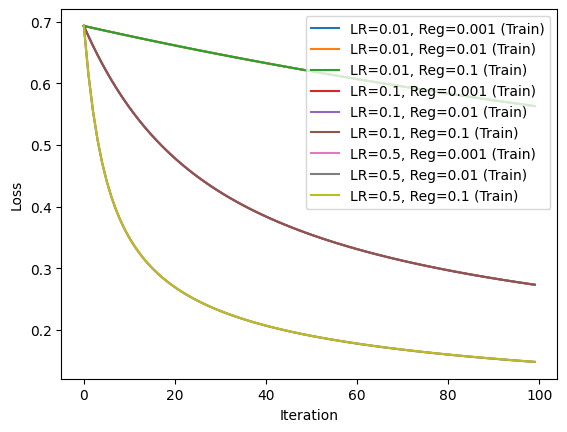

In [ ]:
import matplotlib.pyplot as plt

learning_rates = [0.01, 0.1, 0.5]
reg_constants = [0.001, 0.01, 0.1]

fig, ax = plt.subplots()

for lr in learning_rates:
    for reg in reg_constants:
        log_reg = LogisticRegression()
        theta, loss_history_train = log_reg.fit(X_train, Y_train, regLambda=reg, alpha=lr)
        loss_history_test = [log_reg.computeCost(theta, X_val, Y_val, reg) for theta in loss_history_train]
        ax.plot(loss_history_train, label=f"LR={lr}, Reg={reg} (Train)")
       # ax.plot(loss_history_test, label=f"LR={lr}, Reg={reg} (Test)")

ax.set_xlabel('Iteration')
ax.set_ylabel('Loss')
ax.legend()
plt.show()

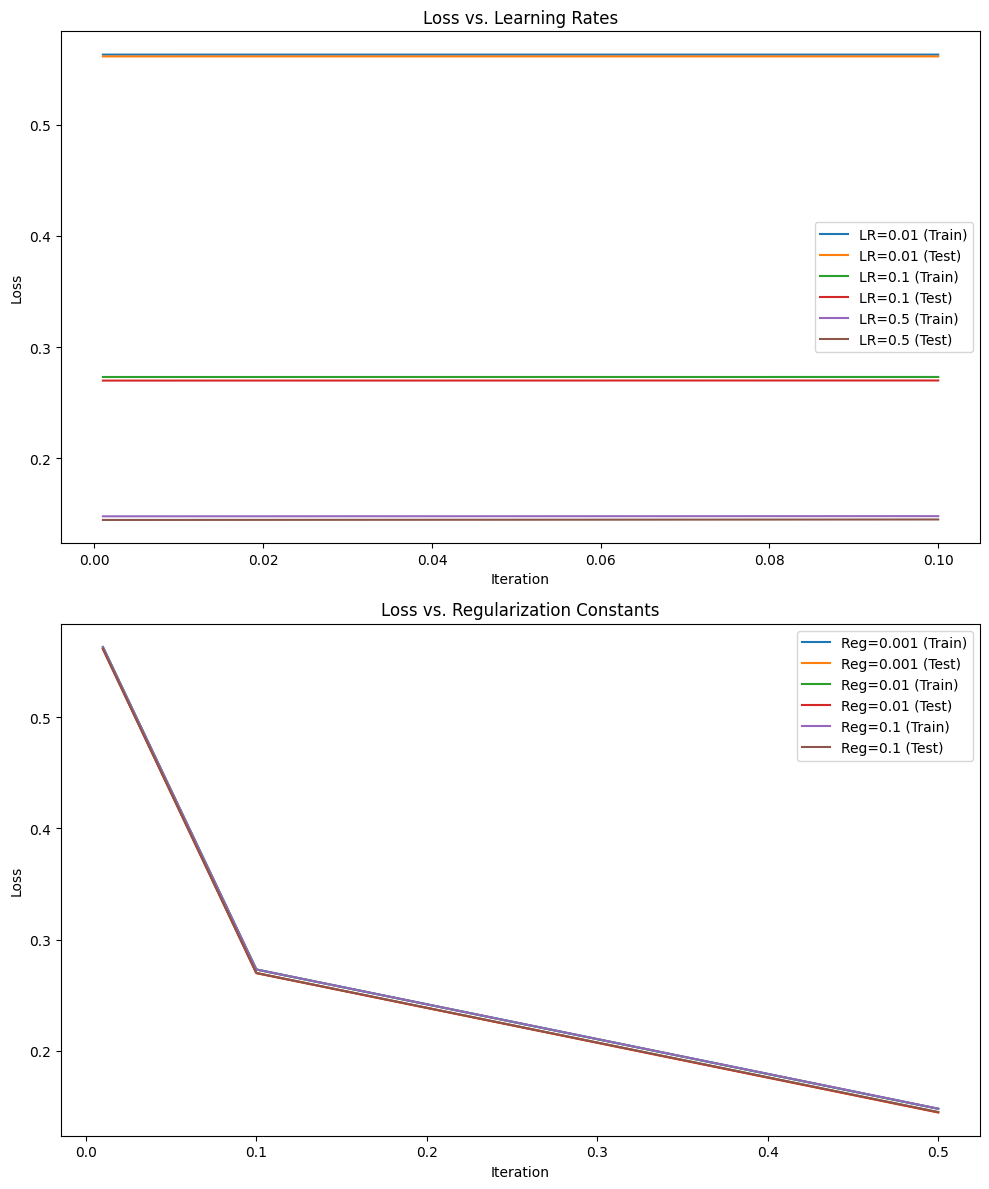

In [ ]:
import matplotlib.pyplot as plt

learning_rates = [0.01, 0.1, 0.5]
reg_constants = [0.001, 0.01, 0.1]

fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot Loss vs. Learning Rates
axs[0].set_title('Loss vs. Learning Rates')
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Loss')

for lr in learning_rates:
    log_reg = LogisticRegression()
    loss_history_train = []
    loss_history_test = []
    for reg in reg_constants:
        theta, loss_history = log_reg.fit(X_train, Y_train, regLambda=reg, alpha=lr)
        loss_history_train.append(loss_history[-1])
        loss_history_test.append(log_reg.computeCost(theta, X_val, Y_val, reg))
    axs[0].plot(reg_constants, loss_history_train, label=f"LR={lr} (Train)")
    axs[0].plot(reg_constants, loss_history_test, label=f"LR={lr} (Test)")

axs[0].legend()

# Plot Loss vs. Regularization Constants
axs[1].set_title('Loss vs. Regularization Constants')
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Loss')

for reg in reg_constants:
    log_reg = LogisticRegression()
    loss_history_train = []
    loss_history_test = []
    for lr in learning_rates:
        theta, loss_history = log_reg.fit(X_train, Y_train, regLambda=reg, alpha=lr)
        loss_history_train.append(loss_history[-1])
        loss_history_test.append(log_reg.computeCost(theta, X_val, Y_val, reg))
    axs[1].plot(learning_rates, loss_history_train, label=f"Reg={reg} (Train)")
    axs[1].plot(learning_rates, loss_history_test, label=f"Reg={reg} (Test)")

axs[1].legend()

plt.tight_layout()
plt.show()

## Naive Bayes

In this part, you will use the `GaussianNB` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**:

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier on the training set
gnb.fit(X_train, Y_train)

# Predict the labels for the test set
Y_pred = gnb.predict(X_test)

# Calculate the accuracy of the classifier on the test set
accuracy = accuracy_score(Y_test, Y_pred)

print(f"The accuracy of the Gaussian Naive Bayes classifier on the test set is: {accuracy}")

The accuracy of the Gaussian Naive Bayes classifier on the test set is: 0.9282828282828283


## LDA (Linear Discriminant Analysis)

In this part, you will use the `LinearDiscriminantAnalysis` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**:

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Initialize the Linear Discriminant Analysis classifier
lda = LinearDiscriminantAnalysis()

# Train the classifier on the training set
lda.fit(X_train, Y_train)

# Predict the labels for the test set
Y_pred = lda.predict(X_test)

# Calculate the accuracy of the classifier on the test set
accuracy = accuracy_score(Y_test, Y_pred)

print(f"The accuracy of the Linear Discriminant Analysis classifier on the test set is: {accuracy}")

The accuracy of the Linear Discriminant Analysis classifier on the test set is: 0.9848484848484849


## Conclution

**Question**: What is the best method for classifying this dataset? What is the best accuracy on the test set?

**Answer**:
Based on the following code, Logistic Regression is the best method or classifying this dataset(Considering the highest accuracy among all the methoodes!)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Initialize the classifiers
log_reg = LogisticRegression()
gnb = GaussianNB()
lda = LinearDiscriminantAnalysis()

# Train and predict using Logistic Regression
log_reg.fit(X_train, Y_train)
Y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(Y_test, Y_pred_log_reg)

# Train and predict using Gaussian Naive Bayes
gnb.fit(X_train, Y_train)
Y_pred_gnb = gnb.predict(X_test)
accuracy_gnb = accuracy_score(Y_test, Y_pred_gnb)

# Train and predict using Linear Discriminant Analysis
lda.fit(X_train, Y_train)
Y_pred_lda = lda.predict(X_test)
accuracy_lda = accuracy_score(Y_test, Y_pred_lda)

# Find the best accuracy and corresponding method
best_accuracy = max(accuracy_log_reg, accuracy_gnb, accuracy_lda)
best_method = "Logistic Regression" if best_accuracy == accuracy_log_reg else "Gaussian Naive Bayes" if best_accuracy == accuracy_gnb else "Linear Discriminant Analysis"

print(f"The best method for classifying this dataset is: {best_method}")
print(f"The best accuracy on the test set is: {best_accuracy}")

The best method for classifying this dataset is: Logistic Regression
The best accuracy on the test set is: 1.0
